In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('thresholding_dataset230724.csv')

In [3]:
df['name_'].unique()

array(['131123', '131123_2', '1410', '1910', '201123', '201123_2', '3110',
       '020324', '030324', '040324', '050324', '2409', '270324',
       'cam1_060424', 'cam1_070424', 'cam1_080424', 'cam1_090424',
       'cam2_190524', 'cam2_200524', 'cam2_210524', 'cam2_220524',
       'cam2_230524', 'cam2_240524', 'cam1_050624', 'cam1_060624',
       'cam1_070624', 'cam1_080624', 'cam1_090624', 'cam1_100624',
       'cam_1_210624', 'cam_1_220624', 'cam_1_230624', 'cam_1_240624'],
      dtype=object)

In [4]:
filtered_data = df[~df['name_'].isin(['cam1_060424', 'cam1_070424', 'cam1_090424','cam2_190524', 'cam2_210524',
                                        'cam2_230524', 'cam2_240524', 'cam1_050624', 'cam1_060624','cam1_080624',
                                        'cam_1_210624', 'cam_1_230624', 'cam_1_240624'])]

In [5]:
filtered_data.head()

,Unnamed: 0,name_,event,inner_seq,side,PC,class
0,0,131123,NaN,0,left,8,normal
1,1,131123,NaN,1,left,3,normal
2,2,131123,NaN,2,left,6,normal
3,3,131123,NaN,3,left,1,normal
4,4,131123,NaN,4,left,0,normal


In [6]:
filtered_data['name_'].unique()

array(['131123', '131123_2', '1410', '1910', '201123', '201123_2', '3110',
       '020324', '030324', '040324', '050324', '2409', '270324',
       'cam1_080424', 'cam2_200524', 'cam2_220524', 'cam1_070624',
       'cam1_090624', 'cam1_100624', 'cam_1_220624'], dtype=object)

In [7]:
def sum_pc_every_n_rows(group,num_row):
    return group.groupby(group.index // num_row)['PC'].sum().reset_index(drop=True)

In [8]:
num_row = [2,6,12]

df5min = df[['class','event','name_','PC']]

df10min = filtered_data.groupby(['class','event','name_'],dropna = False).apply(sum_pc_every_n_rows,num_row[0]).reset_index()
df10min.drop(columns = ['level_3'], inplace = True)

df30min = filtered_data.groupby(['class','event','name_'],dropna = False).apply(sum_pc_every_n_rows,num_row[1]).reset_index()
df30min.drop(columns = ['level_3'], inplace = True)

df60min = filtered_data.groupby(['class','event','name_'],dropna = False).apply(sum_pc_every_n_rows,num_row[2]).reset_index()
df60min.drop(columns = ['level_3'], inplace = True)


In [9]:
df10min.head()

,class,event,name_,PC
0,crush,0.0,cam1_080424,11
1,crush,0.0,cam1_080424,9
2,crush,0.0,cam1_080424,14
3,crush,0.0,cam1_080424,20
4,crush,0.0,cam1_080424,9


Text(0.5, 1.0, 'crushing vs non-crushing 60 min interval')

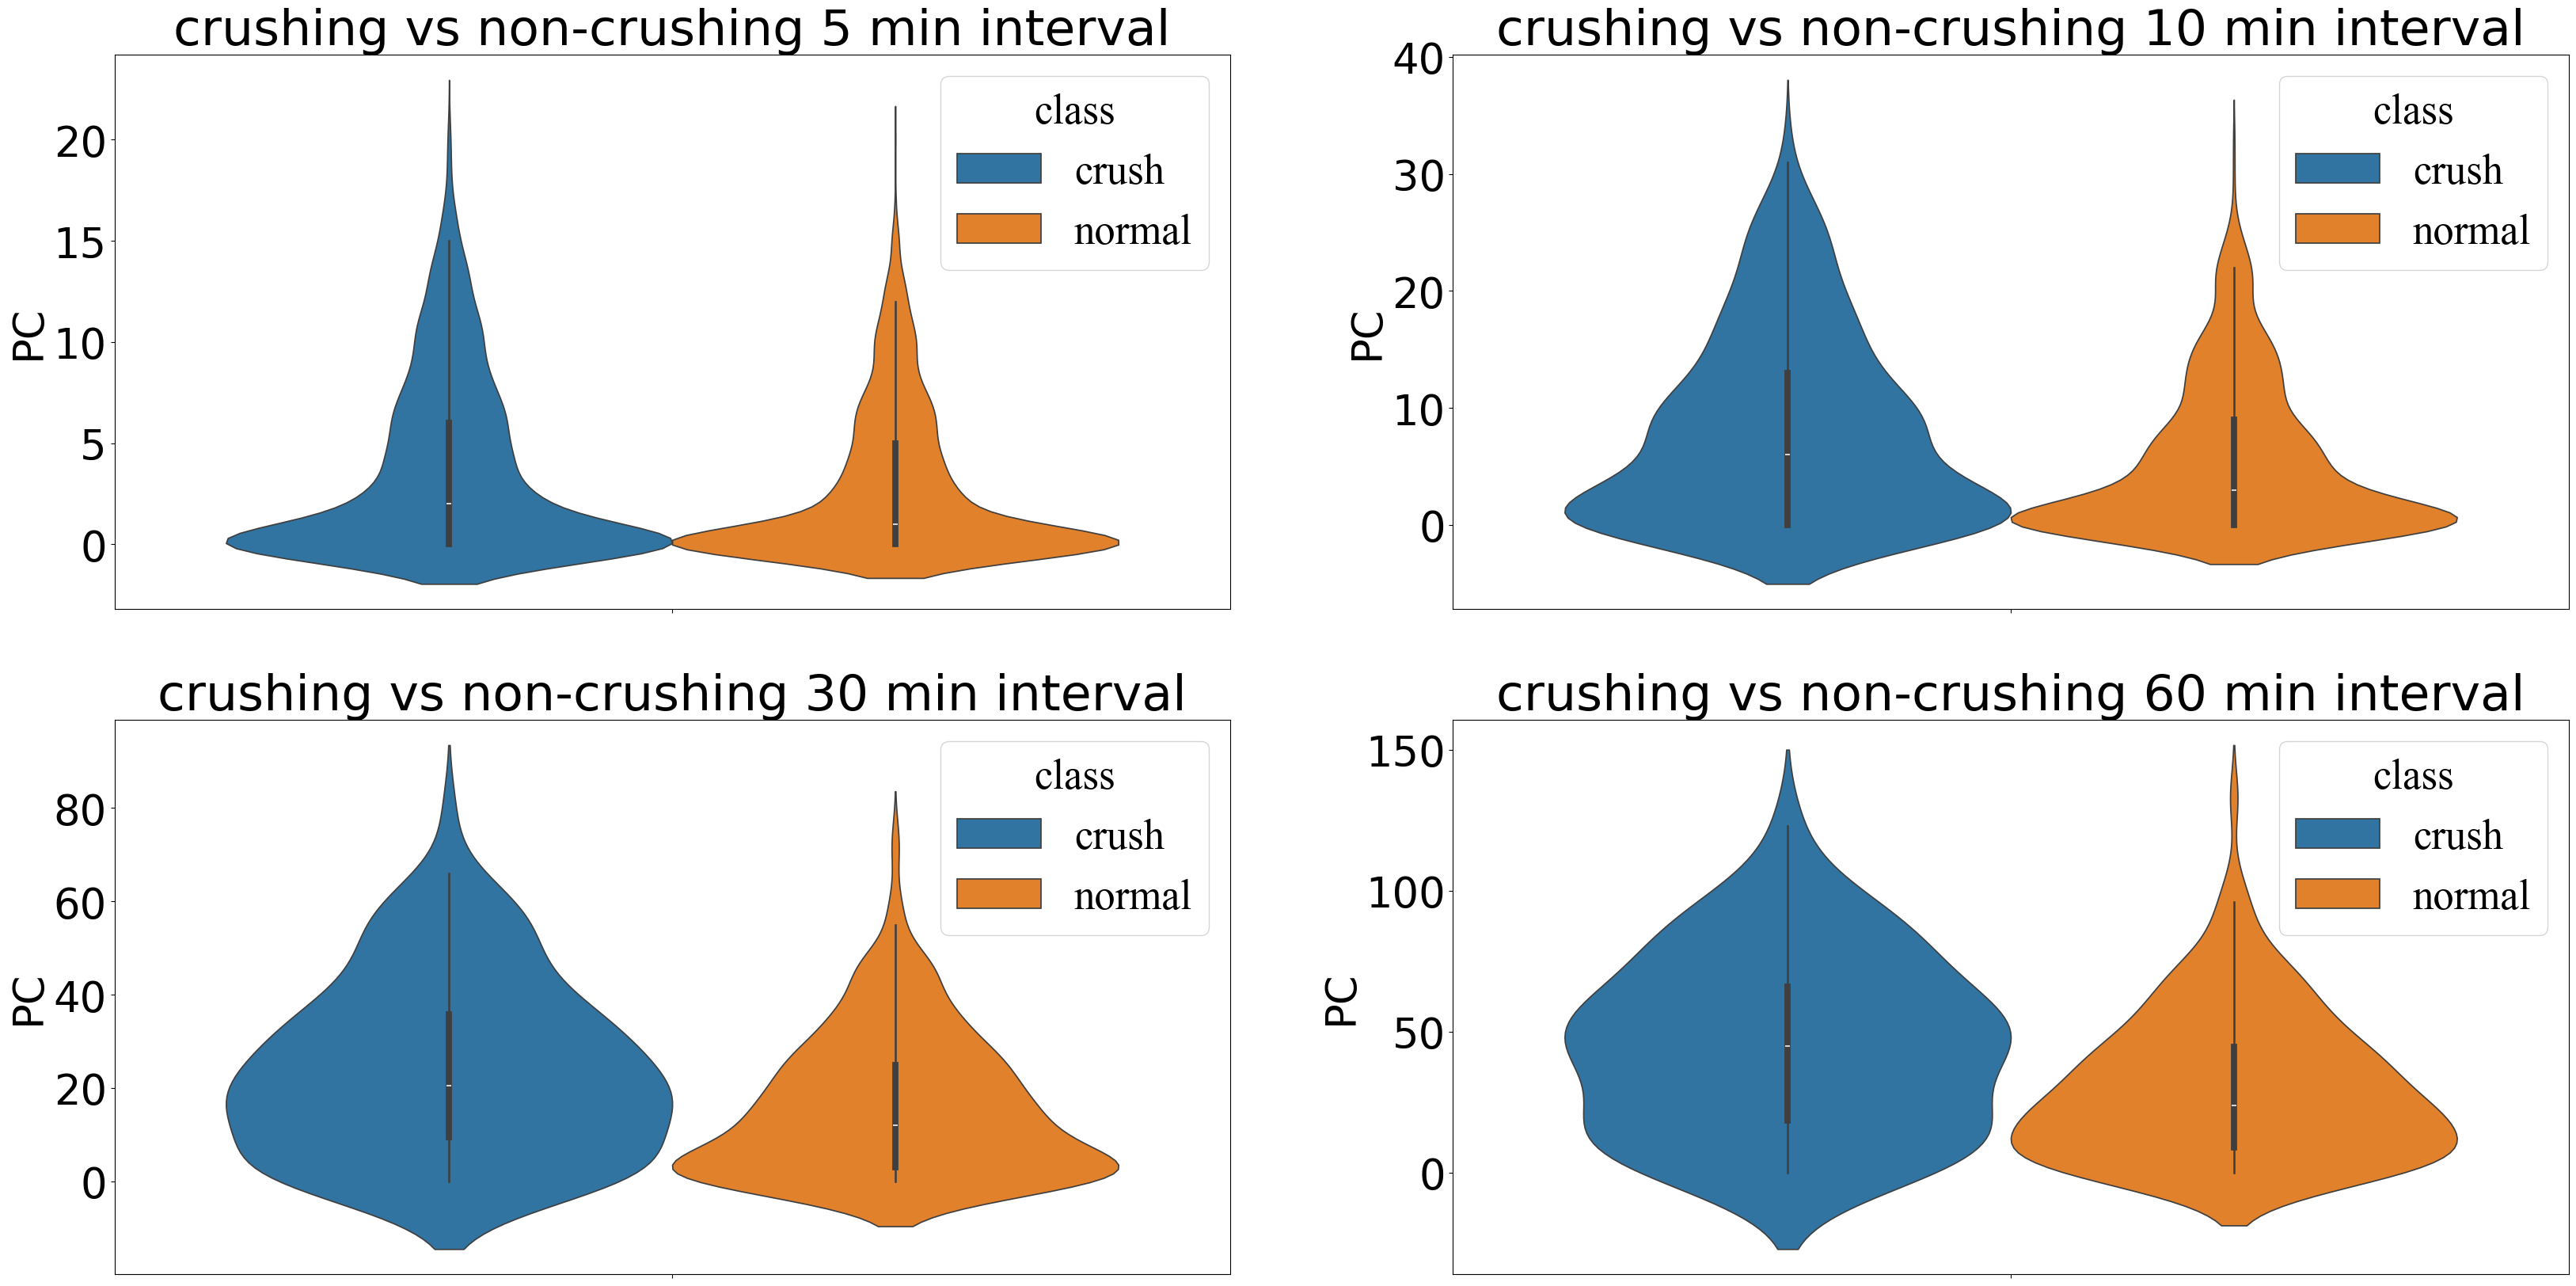

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(40, 20))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 38})
sn.violinplot(ax = axs[0,0], data=df5min.iloc[::-1],  hue="class", y="PC")
axs[0,0].set_title("crushing vs non-crushing 5 min interval")

sn.violinplot(ax = axs[0,1], data=df10min, hue="class", y="PC")
axs[0,1].set_title("crushing vs non-crushing 10 min interval")

sn.violinplot(ax = axs[1,0], data=df30min, hue="class", y="PC")
axs[1,0].set_title("crushing vs non-crushing 30 min interval")

sn.violinplot(ax = axs[1,1], data=df60min, hue="class", y="PC")
axs[1,1].set_title("crushing vs non-crushing 60 min interval")

<Axes: ylabel='PC'>

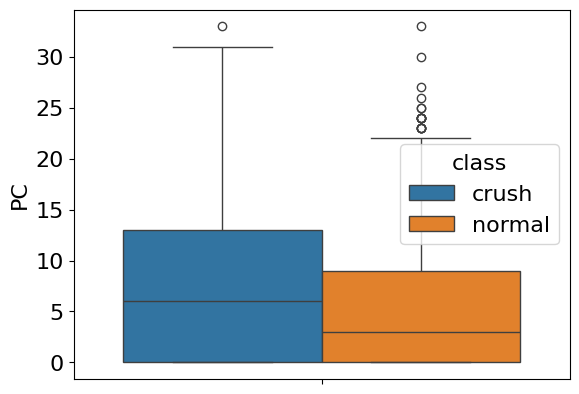

In [11]:
sn.boxplot( data=df10min, hue="class", y="PC")

In [20]:
a = df5min.groupby(['class'])['PC'].describe()
b = df10min.groupby(['class'])['PC'].describe()
c = df30min.groupby(['class'])['PC'].describe()
d = df60min.groupby(['class'])['PC'].describe()

In [21]:
for i in [a,b,c,d]:
    print(i)

         count      mean       std  min  25%  50%  75%   max
class                                                       
crush   1904.0  3.682248  4.428966  0.0  0.0  2.0  6.0  21.0
normal  1721.0  2.774550  3.694947  0.0  0.0  1.0  5.0  20.0
        count      mean       std  min  25%  50%   75%   max
class                                                       
crush   343.0  8.233236  8.092185  0.0  0.0  6.0  13.0  33.0
normal  864.0  5.526620  6.465291  0.0  0.0  3.0   9.0  33.0
        count       mean        std  min  25%   50%    75%   max
class                                                           
crush   118.0  23.932203  18.808404  0.0  9.5  20.5  35.75  79.0
normal  301.0  15.863787  15.030127  0.0  3.0  12.0  25.00  74.0
        count       mean        std  min   25%   50%    75%    max
class                                                             
crush    63.0  44.825397  30.997679  0.0  18.5  45.0  66.00  123.0
normal  158.0  30.221519  25.708712  0.0   9.0  24.

In [22]:
df10min['name_'].unique()

array(['cam1_080424', 'cam2_200524', 'cam2_220524', 'cam1_070624',
       'cam1_090624', 'cam1_100624', 'cam_1_220624', '020324', '030324',
       '040324', '050324', '131123', '131123_2', '1410', '1910', '201123',
       '201123_2', '2409', '270324', '3110'], dtype=object)

In [23]:
threshold = 6 
df10min['detect'] = np.where(df10min['PC'] >= threshold, 1, 0)

In [47]:
df10min.tail(50)

,class,event,name_,PC,detect
1157,normal,NaN,3110,20,1
1158,normal,NaN,3110,10,1
1159,normal,NaN,3110,16,1
1160,normal,NaN,3110,0,0
1161,normal,NaN,3110,3,0
1162,normal,NaN,3110,23,1
1163,normal,NaN,3110,0,0
1164,normal,NaN,3110,1,0
1165,normal,NaN,3110,24,1
1166,normal,NaN,3110,5,0


In [25]:
##### voting #####

num_row = 6


def sum_detect_every_n_rows(group,num_row):
    return group.groupby(group.index // num_row)['detect'].sum().reset_index(drop=True)

e = df10min.groupby(['class','name_']).apply(sum_detect_every_n_rows,num_row).reset_index()
e.drop(columns = ['level_2'], inplace = True)

vote = 3 
e['vote'] = np.where(e['detect'] >= vote, 1, 0)


In [49]:
e.tail(30)

,class,name_,detect,vote
190,normal,2409,0,0
191,normal,2409,0,0
192,normal,2409,0,0
193,normal,2409,2,0
194,normal,2409,4,1
195,normal,2409,0,0
196,normal,270324,1,0
197,normal,270324,3,1
198,normal,270324,1,0
199,normal,270324,0,0


In [26]:
f = e.groupby(['class','name_'])['vote'].describe()
f['sum'] = e.groupby(['class','name_'])['vote'].sum()
f['count-sum'] = f['count'] - f['sum']
f = f.reset_index()

In [27]:
f

,class,name_,count,mean,std,min,25%,50%,75%,max,sum,count-sum
0,crush,cam1_070624,9.0,0.555556,0.527046,0.0,0.0,1.0,1.00,1.0,5,4.0
1,crush,cam1_080424,11.0,0.818182,0.404520,0.0,1.0,1.0,1.00,1.0,9,2.0
2,crush,cam1_090624,9.0,0.333333,0.500000,0.0,0.0,0.0,1.00,1.0,3,6.0
3,crush,cam1_100624,9.0,0.555556,0.527046,0.0,0.0,1.0,1.00,1.0,5,4.0
4,crush,cam2_200524,9.0,0.888889,0.333333,0.0,1.0,1.0,1.00,1.0,8,1.0
5,crush,cam2_220524,8.0,0.875000,0.353553,0.0,1.0,1.0,1.00,1.0,7,1.0
6,crush,cam_1_220624,9.0,0.333333,0.500000,0.0,0.0,0.0,1.00,1.0,3,6.0
7,normal,020324,8.0,0.500000,0.534522,0.0,0.0,0.5,1.00,1.0,4,4.0
8,normal,030324,9.0,0.333333,0.500000,0.0,0.0,0.0,1.00,1.0,3,6.0
9,normal,040324,9.0,0.444444,0.527046,0.0,0.0,0.0,1.00,1.0,4,5.0


In [34]:
f['%Detect'] = f['sum']/f['count']
f['%NotDetect'] = f['count-sum']/f['count']

Text(0.5, 0, 'Class(day)')

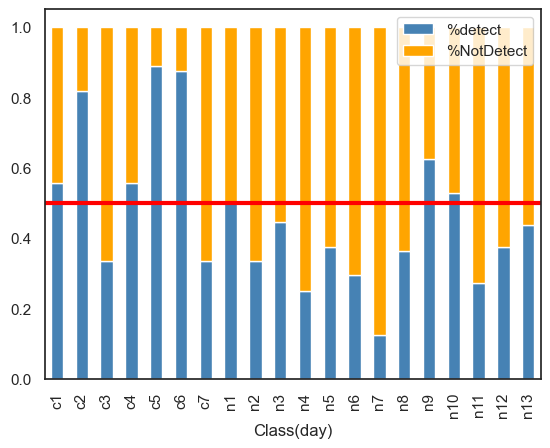

In [44]:
#set seaborn plotting aesthetics
sn.set(style='white')

#create stacked bar chart
ax = f[['name_', '%detect', '%NotDetect']].set_index('name_').plot(kind='bar', stacked=True, color=['steelblue', 'orange'])
ax.set_xticklabels(['c1','c2','c3','c4','c5','c6','c7','n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13'])
plt.axhline(y=0.5, color = 'red', lw = 3)
plt.xlabel('Class(day)')


In [48]:
tp = f[f['class'] == 'crush']['sum'].sum()
fn = f[f['class'] == 'crush']['count-sum'].sum()

fp = f[f['class'] == 'normal']['sum'].sum()
tn = f[f['class'] == 'normal']['count-sum'].sum()

In [49]:
se = tp/(tp+fn)
sp = tn/(tn+fp)

In [50]:
print('sensitivity:', se)
print('specificity:', sp)

sensitivity: 0.625
specificity: 0.6025641025641025


In [20]:
df60min

,class,event,name_,PC
0,crush,0.0,cam1_080424,20
1,crush,0.0,cam1_080424,102
2,crush,0.0,cam1_080424,93
3,crush,0.0,cam1_080424,36
4,crush,0.0,cam1_080424,102
...,...,...,...,...
216,normal,NaN,3110,46
217,normal,NaN,3110,67
218,normal,NaN,3110,67
219,normal,NaN,3110,96
